#**Importing Required Libraries**

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# **Loading Data**


In [108]:
b_data = pd.read_csv("data.csv", encoding ="ISO-8859-1")

#**Studying Data**

In [109]:
b_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes


In [110]:
b_data.shape

(8760, 14)

In [111]:
b_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.000,704.602,644.997,0.000,191.000,504.500,1065.250,3556.000
Hour,8760.000,11.500,6.923,0.000,5.750,11.500,17.250,23.000
Temperature(°C),8760.000,12.883,11.945,-17.800,3.500,13.700,22.500,39.400
Humidity(%),8760.000,58.226,20.362,0.000,42.000,57.000,74.000,98.000
Wind speed (m/s),8760.000,1.725,1.036,0.000,0.900,1.500,2.300,7.400
Visibility (10m),8760.000,1436.826,608.299,27.000,940.000,1698.000,2000.000,2000.000
Dew point temperature(°C),8760.000,4.074,13.060,-30.600,-4.700,5.100,14.800,27.200
Solar Radiation (MJ/m2),8760.000,0.569,0.869,0.000,0.000,0.010,0.930,3.520
Rainfall(mm),8760.000,0.149,1.128,0.000,0.000,0.000,0.000,35.000
Snowfall (cm),8760.000,0.075,0.437,0.000,0.000,0.000,0.000,8.800


In [112]:
b_data.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [113]:
b_data.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Wind_speed,0
Visibility,0
Dew_point_temperature,0
Solar_Radiation,0
Rainfall,0


In [114]:
b_data.duplicated().value_counts()

,count
False,8760


In [115]:
df = b_data.copy()
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, dayfirst=True)
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['day'] = df['Date'].dt.day_name()
df['year'] = df['Date'].dt.year
df.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,year
0,2017-12-01,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Dec,Friday,2017


In [116]:
def total(df,var):
  total = len(df[var].value_counts())
  return total

In [117]:
total_lenght_different_column = {
    'Seasons': total(df,'Seasons'),
    'Holiday': total(df,'Holiday'),
    'Funtioning_Day': total(df,'Functioning_Day'),
    'month' : total(df,'month'),
    'day'   : total(df,'day'),
    'year'  : total(df,'year')
}

In [118]:
total_df = pd.DataFrame.from_dict(total_lenght_different_column,orient='index')
total_df.T

,Seasons,Holiday,Funtioning_Day,month,day,year
0,4,2,2,12,7,2


In [119]:
df.drop(columns=['Date'],inplace=True)

In [120]:
df['Hour']=df['Hour'].astype('object')
df['year'] = df['year'].astype('object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  day                    8760 non-null   object 
 15  year

# **Exploratory Data Analysis**


In [122]:
num_feature = df.select_dtypes(exclude='object')
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


In [123]:
cat_feature = df.select_dtypes(include='object')
print(f'Categorical feature : {cat_feature.columns.to_list()}')

Categorical feature : ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month', 'day', 'year']


In [124]:
def density_plot(df,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85');
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median');
    plt.tight_layout();

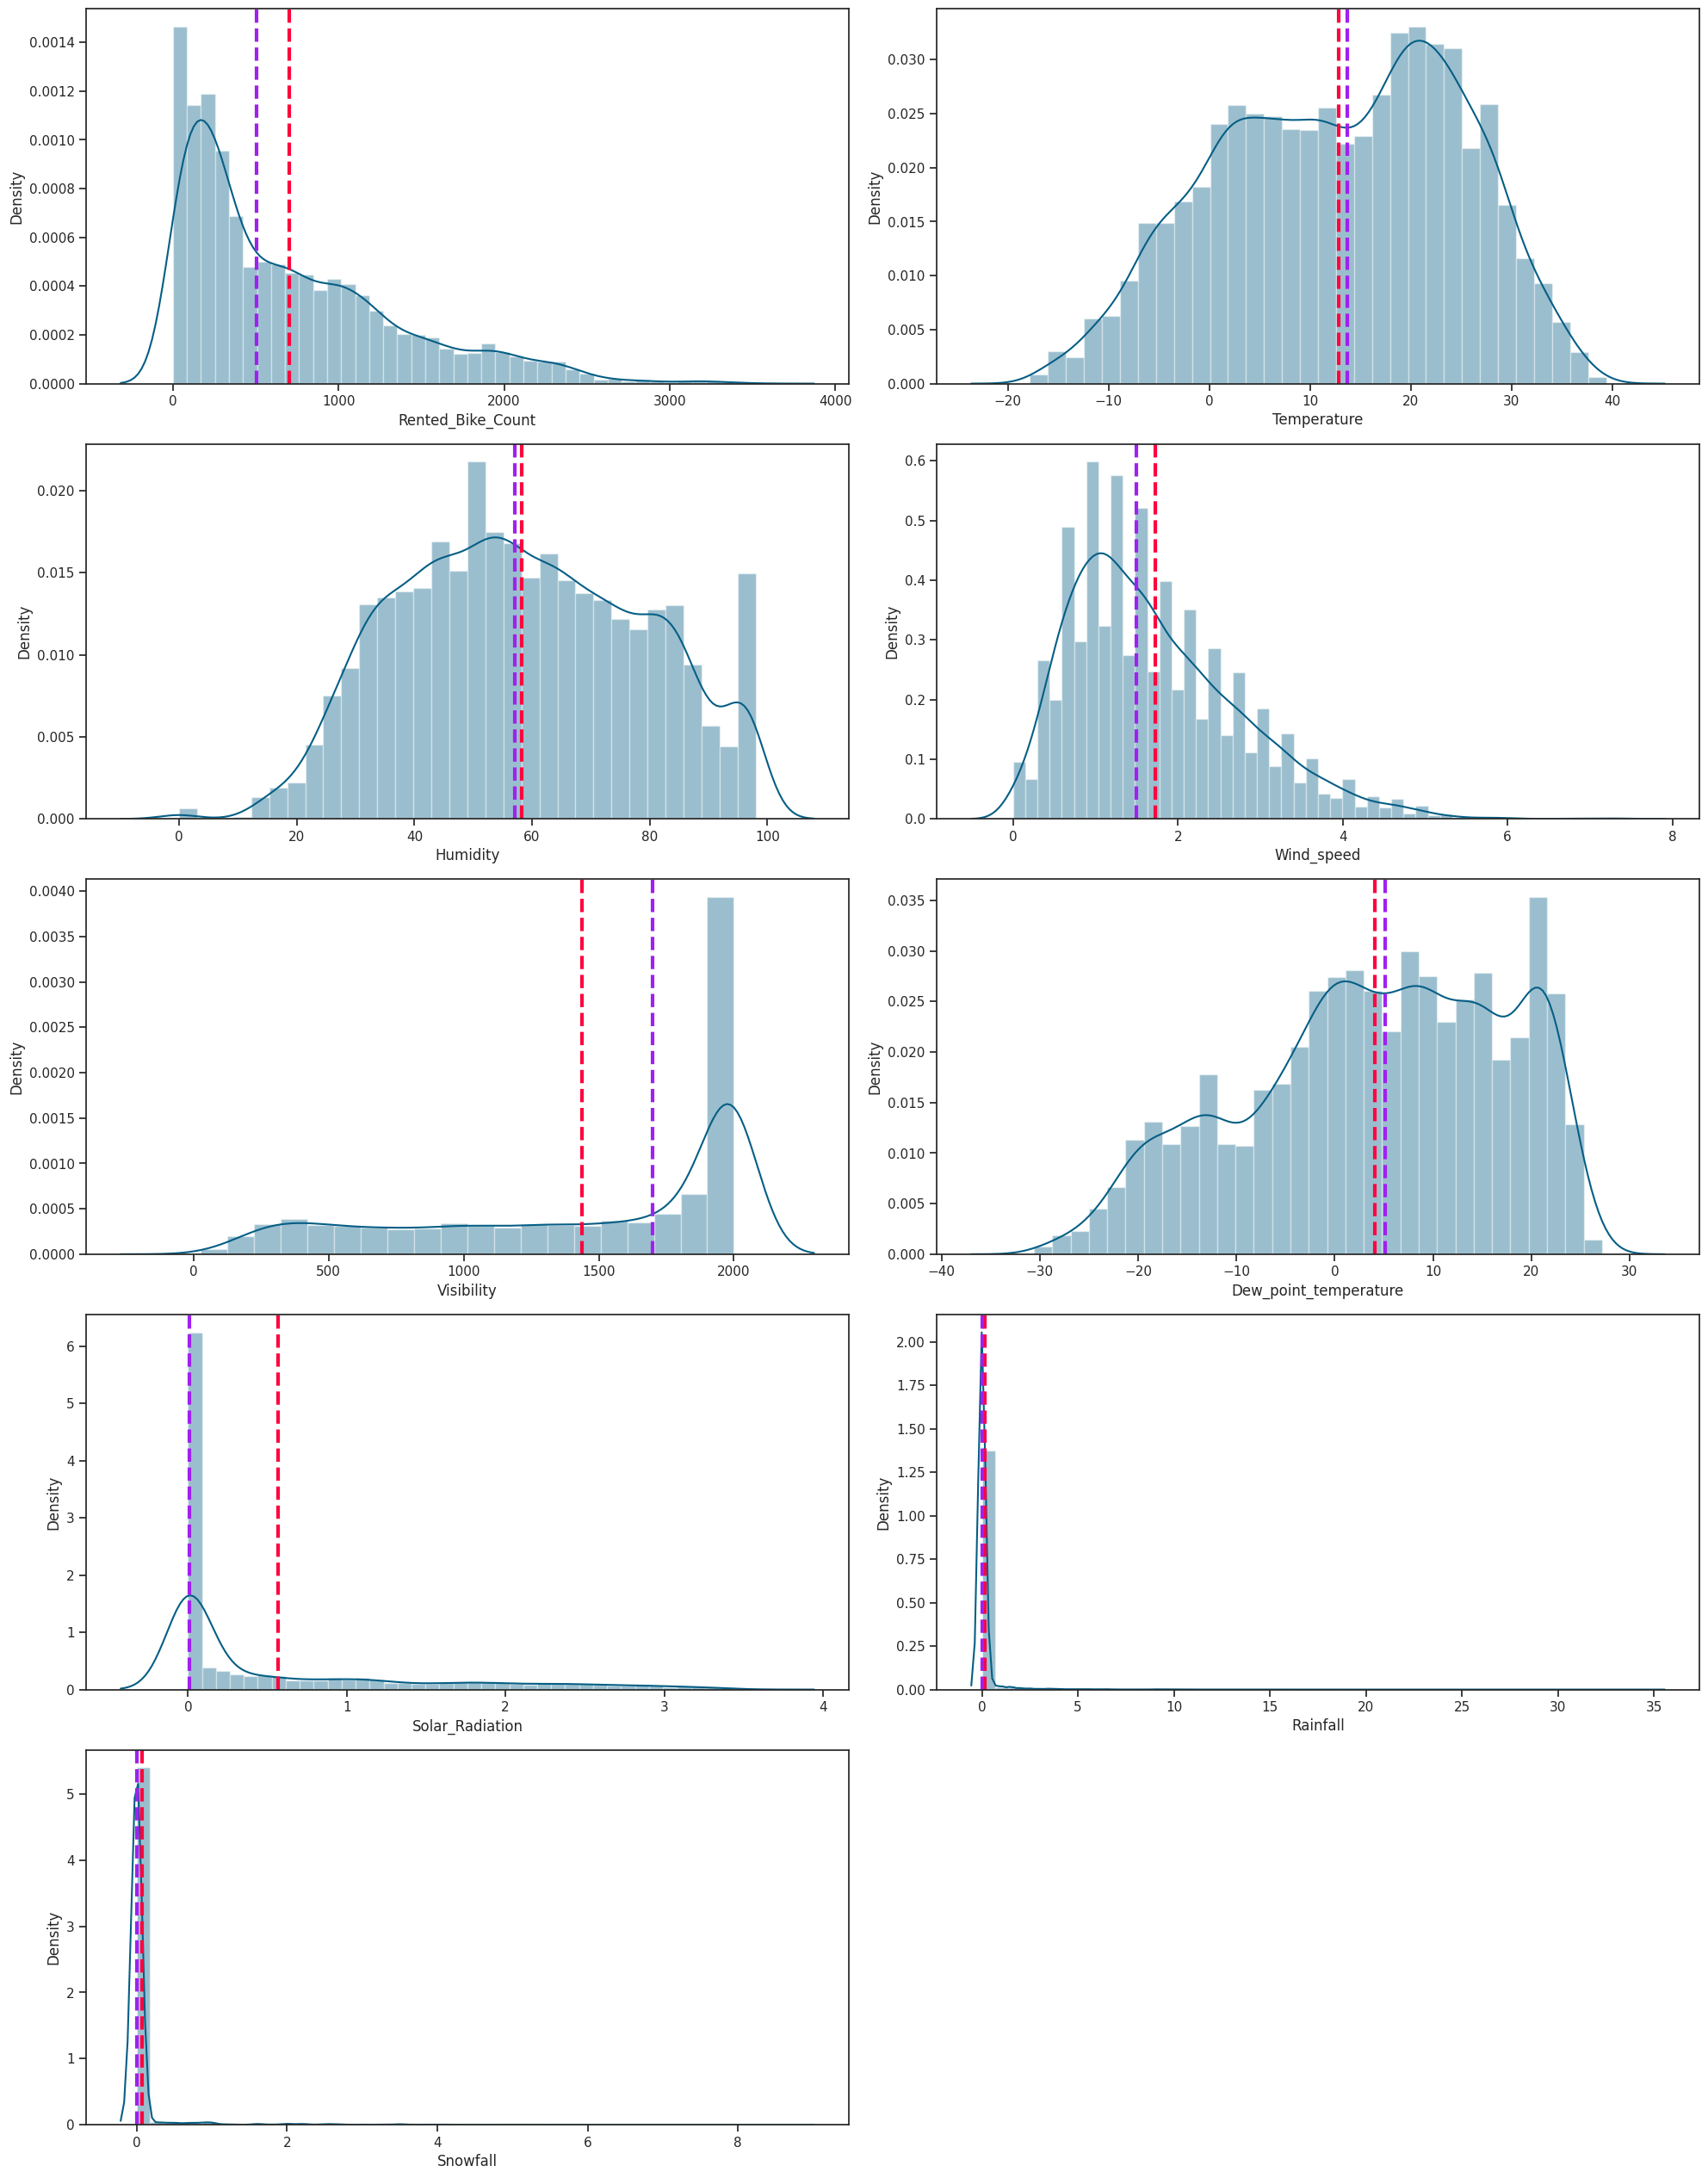

In [125]:
density_plot(df,num_feature)

<Figure size 1500x600 with 0 Axes>

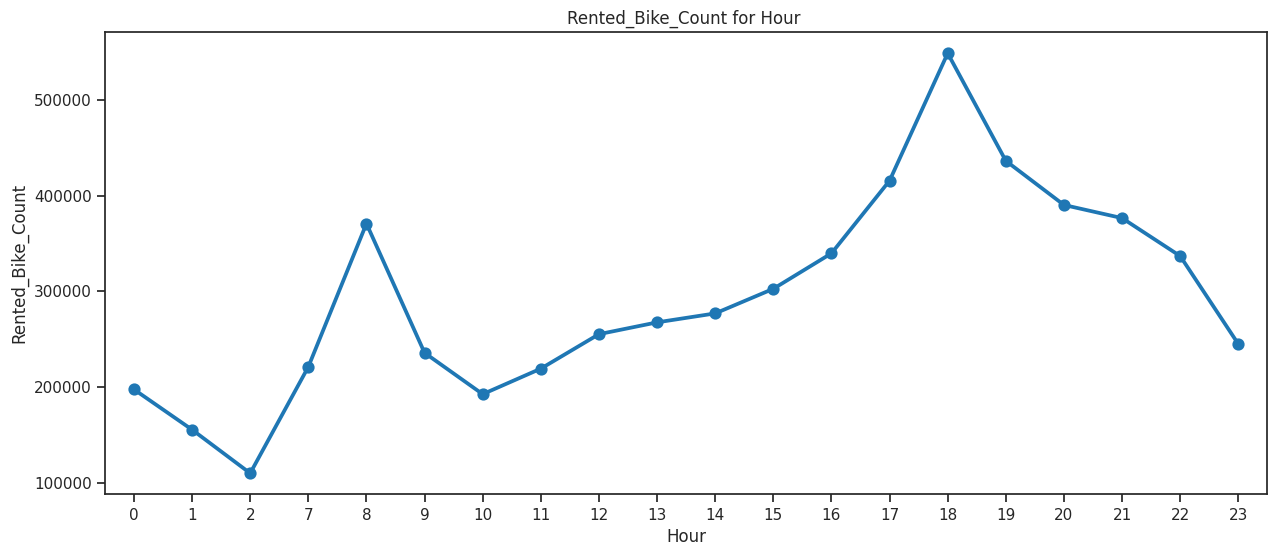

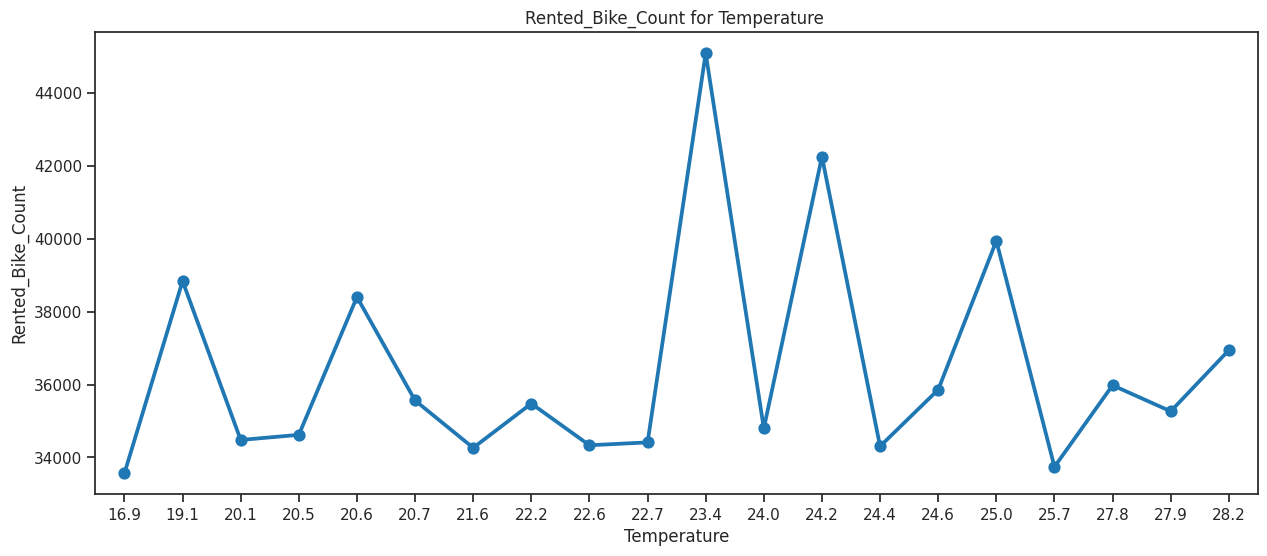

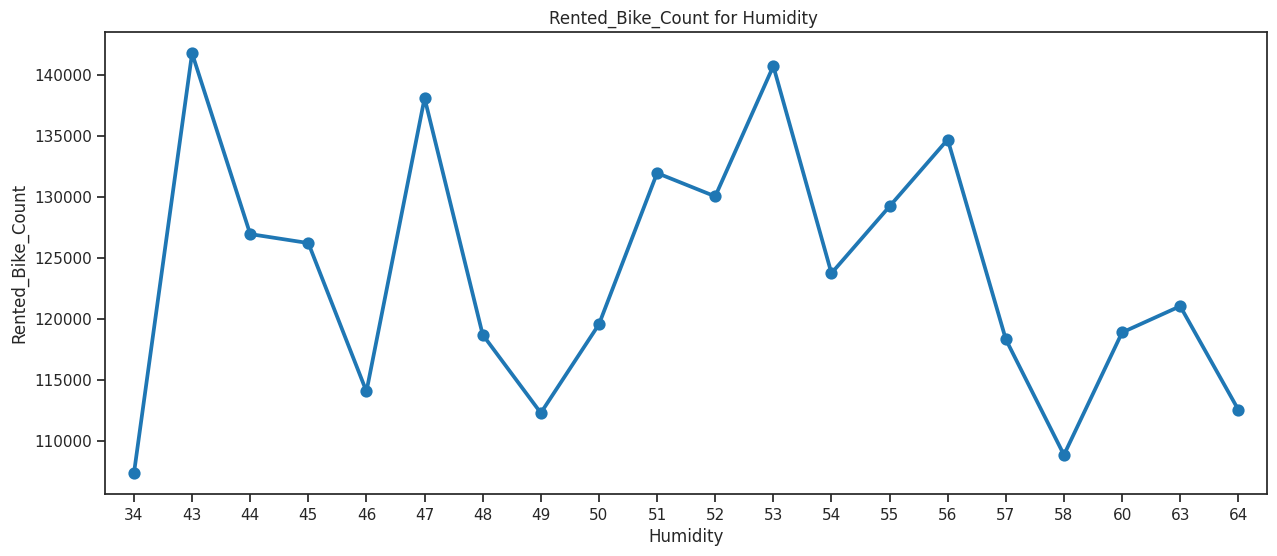

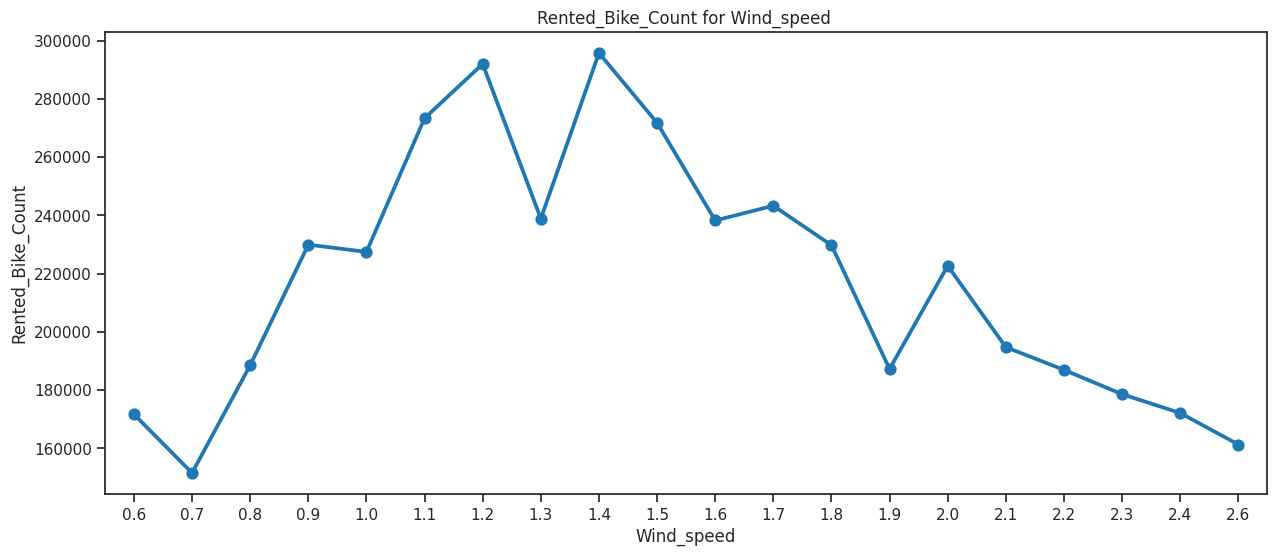

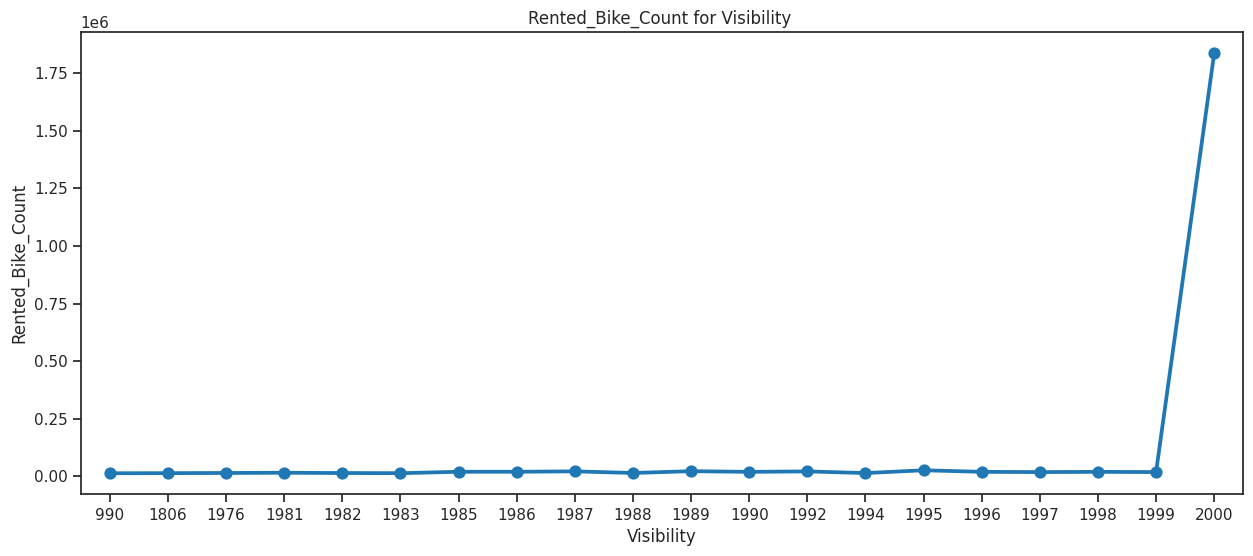

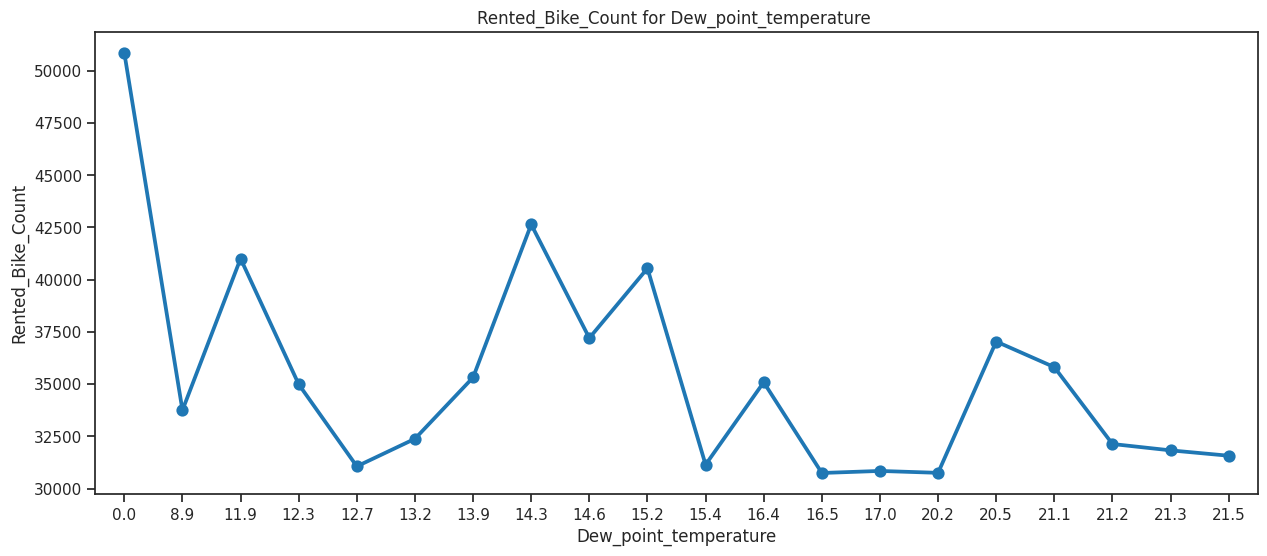

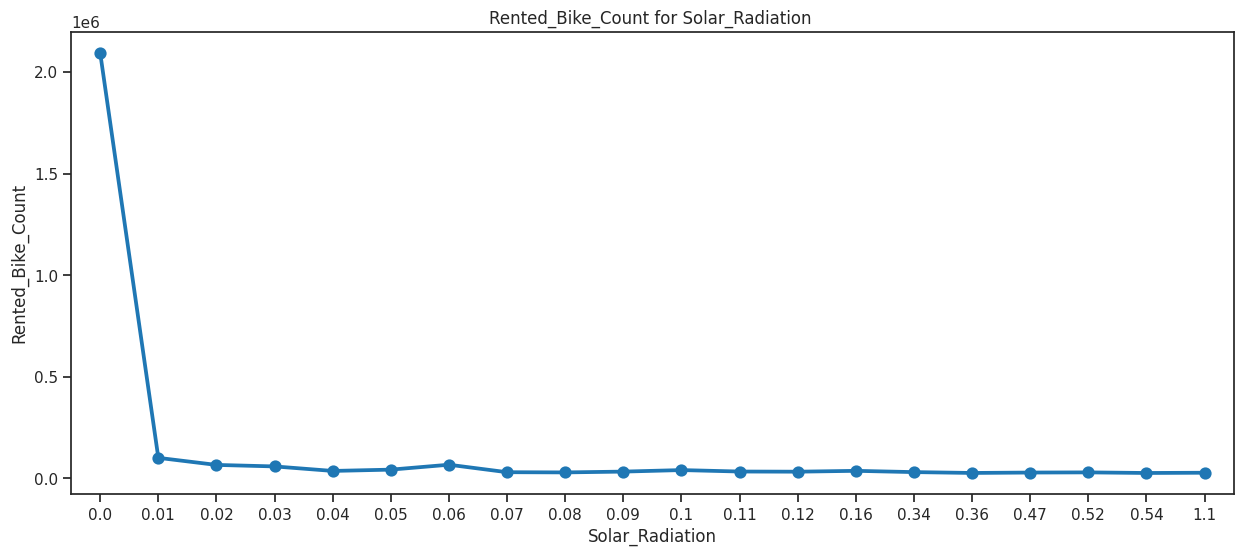

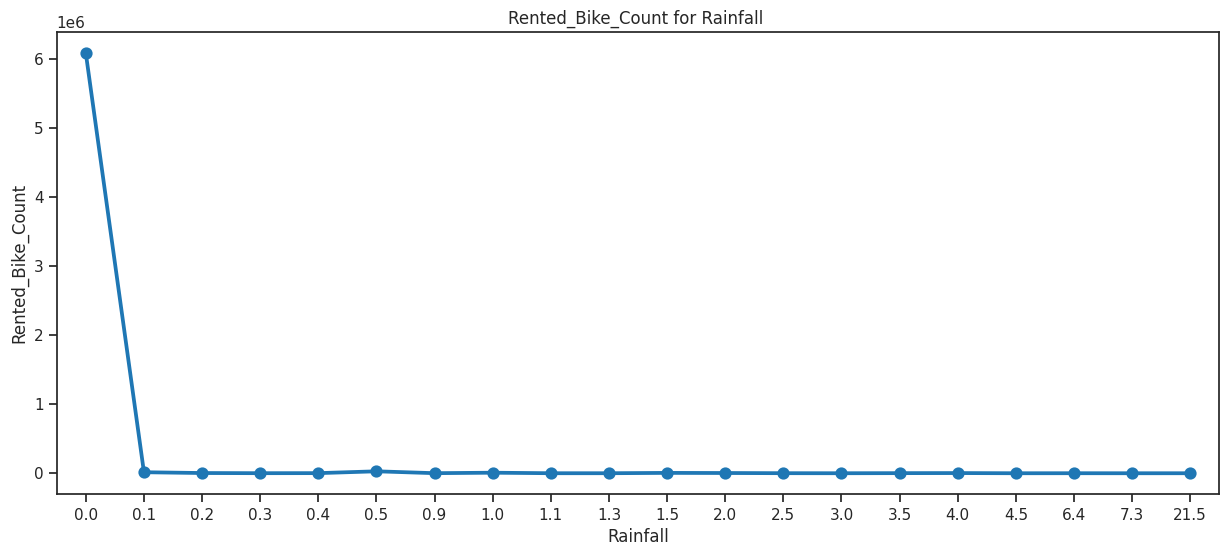

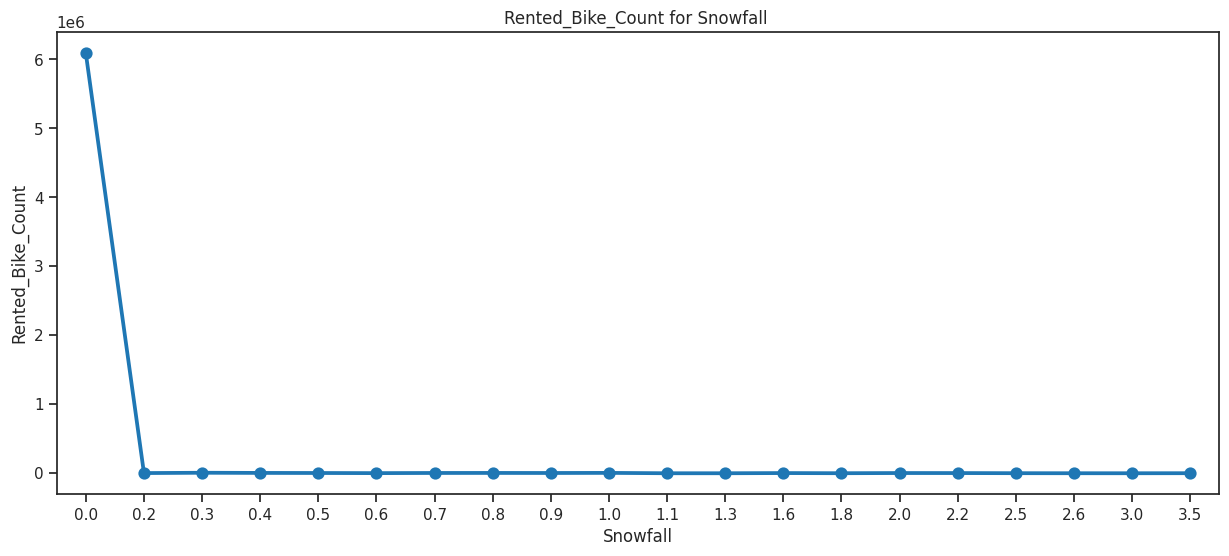

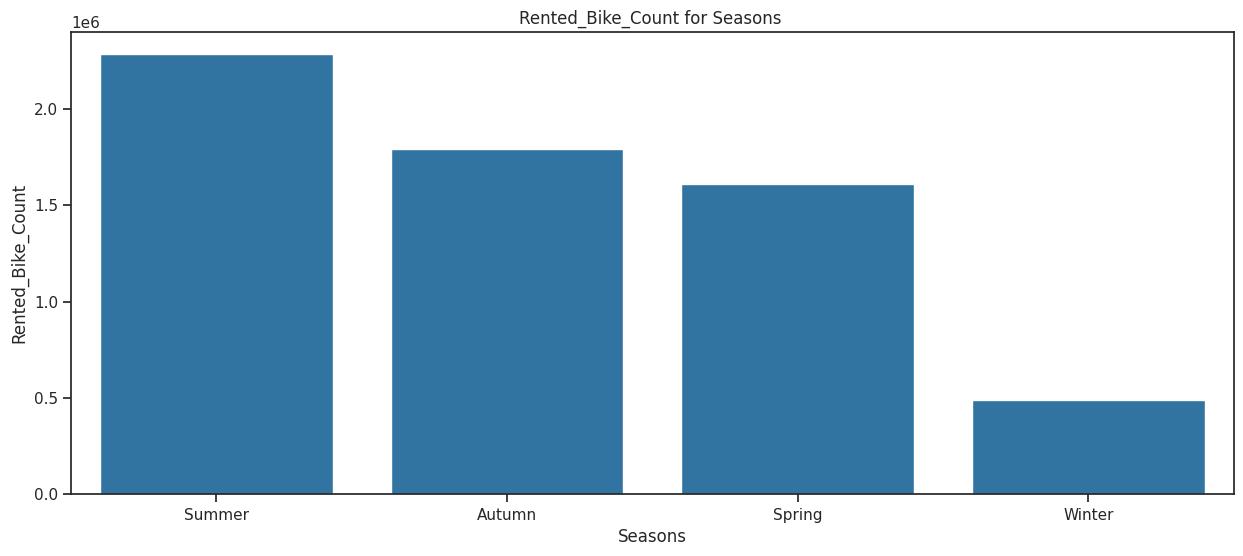

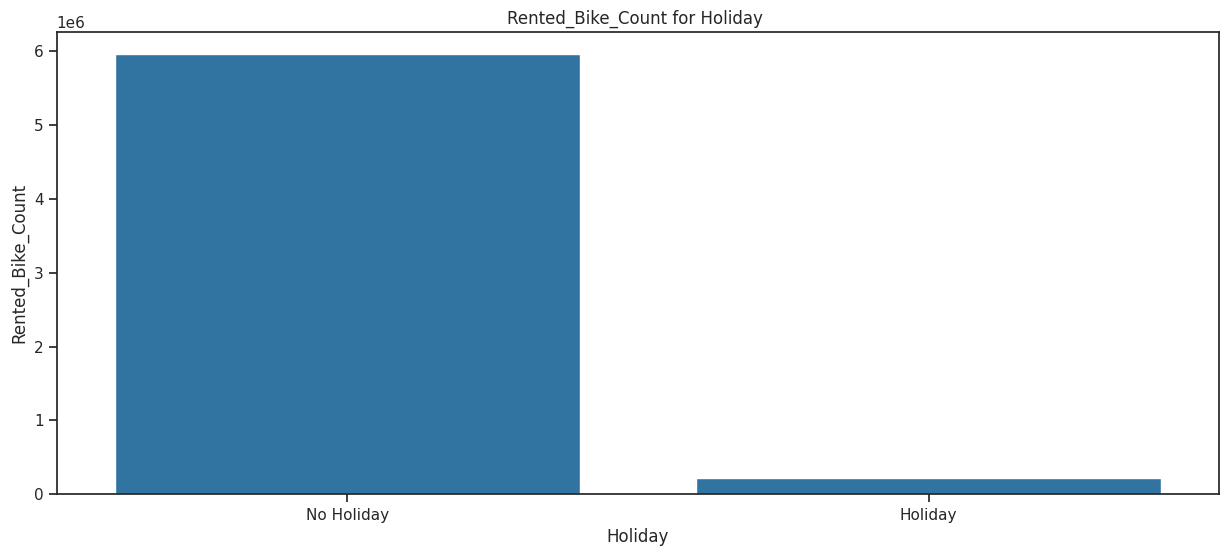

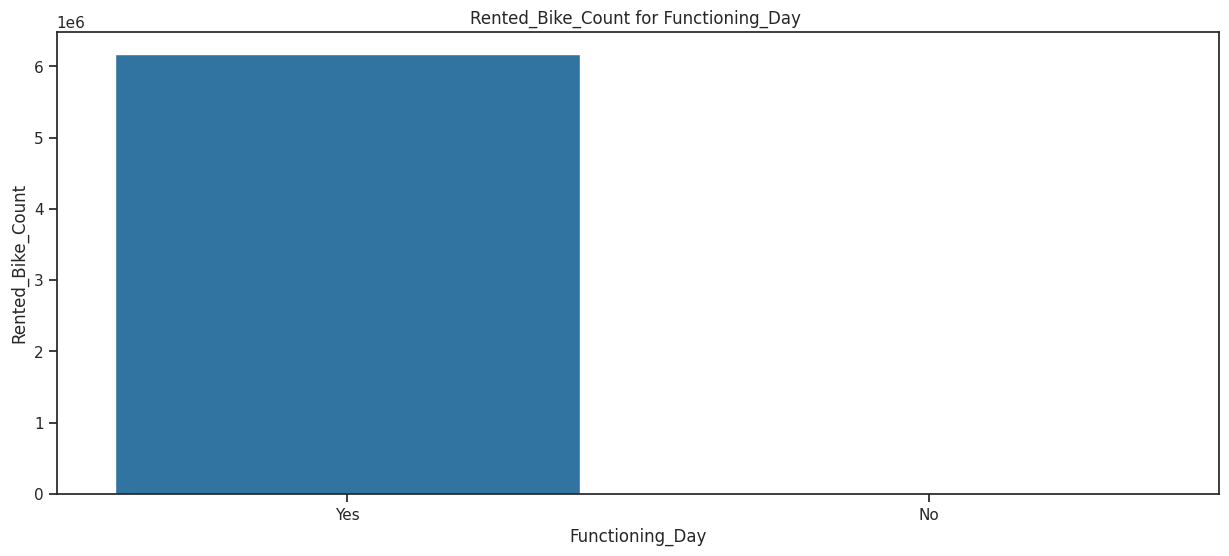

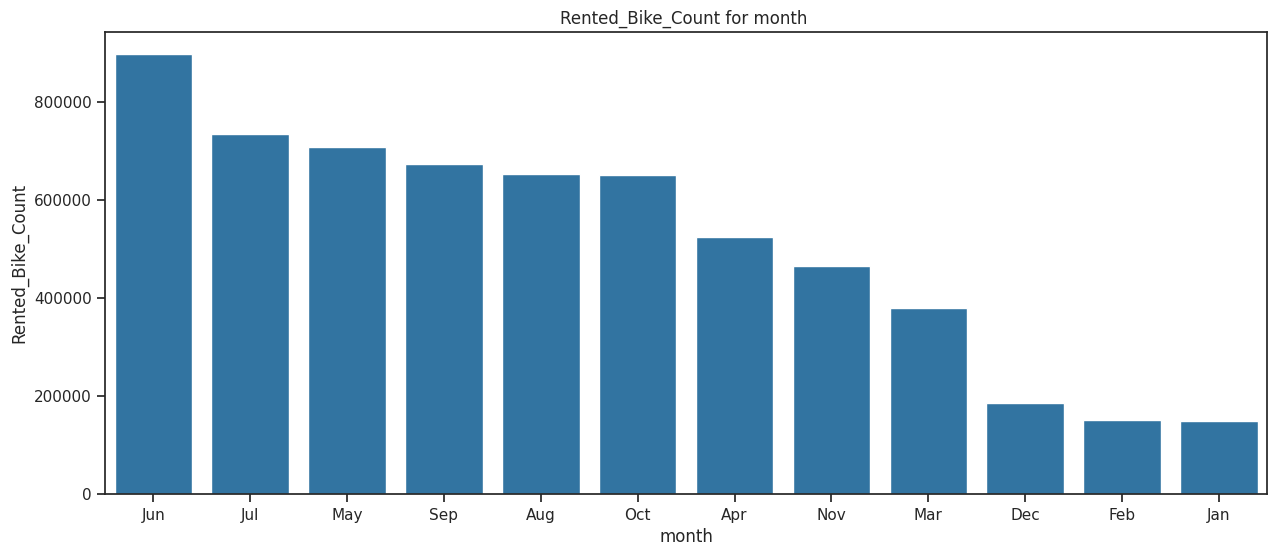

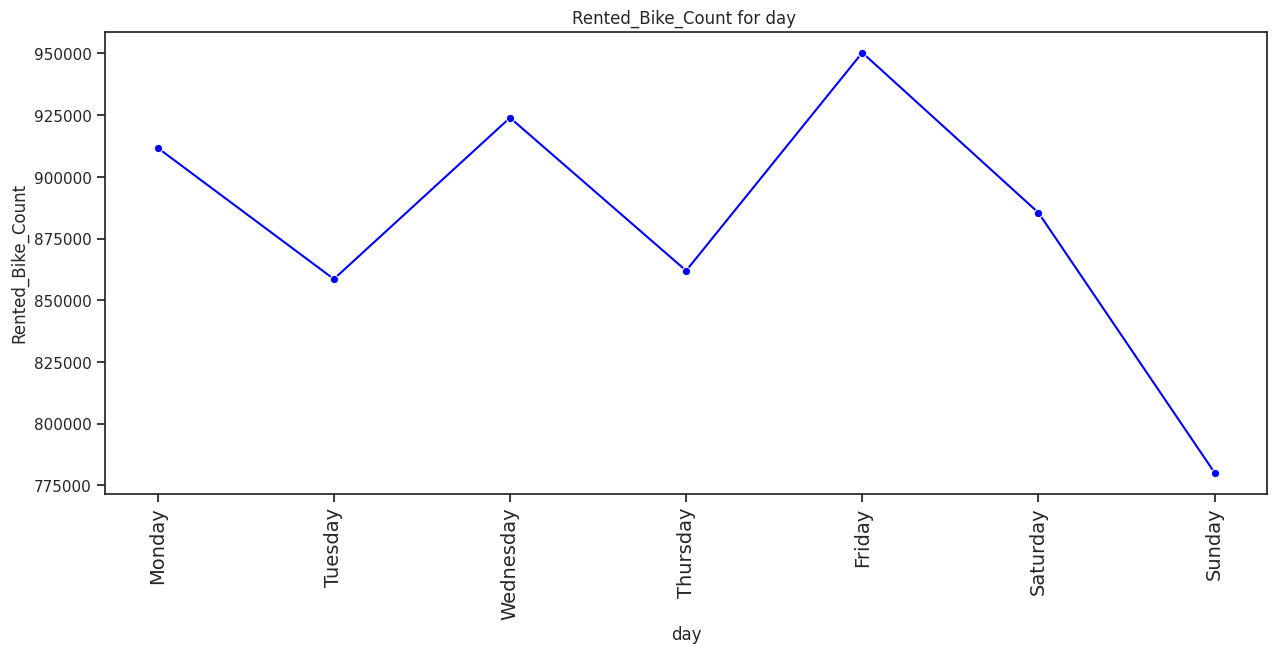

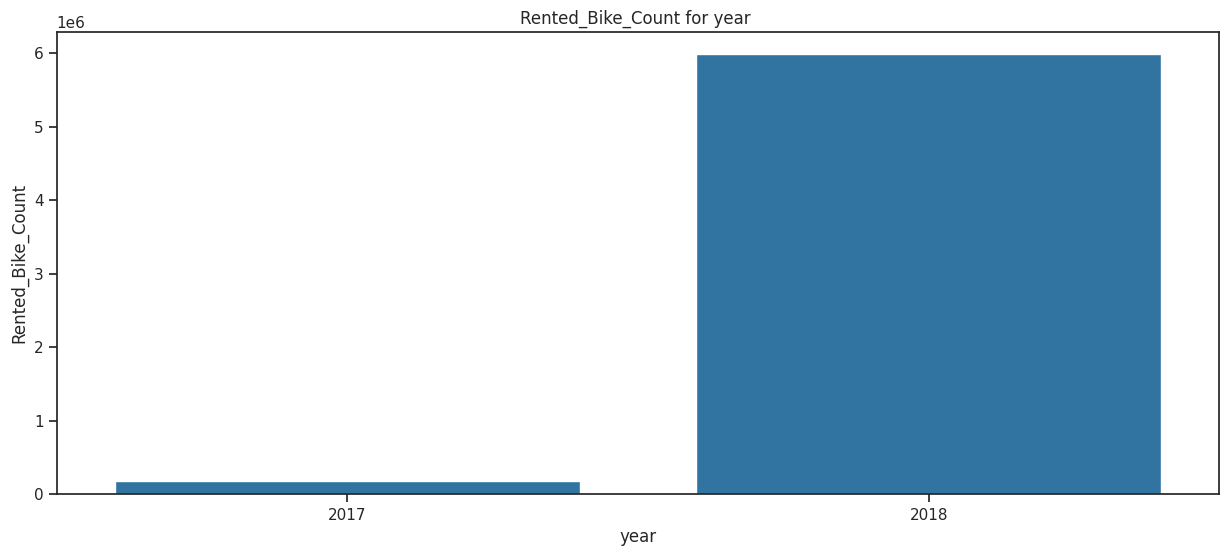

In [126]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  if i == 'Rented_Bike_Count':
    pass
  elif i in ['Seasons','Holiday','Functioning_Day','month','year']:
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
    sns.barplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for {i} ");
    print('\n')
  elif i == 'day':
    workingdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',ascending = False)
    chart = workingday.merge(grp)
    sns.lineplot(data= chart, x=chart[i],y= chart['Rented_Bike_Count'], marker= 'o', color = 'blue');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented_Bike_Count for {i} ");
  else :
    grp = df.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False).head(20)
    sns.set_context('notebook');
    sns.pointplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for {i} ");
    print('\n')

  plt.show()

In [127]:
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
  return data

In [128]:
group_by(df,'Functioning_Day')

,Functioning_Day,Rented_Bike_Count
1,Yes,6172314
0,No,0


In [129]:
group_by(df,'Holiday')

,Holiday,Rented_Bike_Count
1,No Holiday,5956419
0,Holiday,215895


In [130]:
group_by(df,'year')

,year,Rented_Bike_Count
1,2018,5986984
0,2017,185330


In [131]:
group_by(df,'Seasons')

,Seasons,Rented_Bike_Count
2,Summer,2283234
0,Autumn,1790002
1,Spring,1611909
3,Winter,487169


In [132]:
weekend = group_by(df,'day')
chutti = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
chutti

,day,Rented_Bike_Count
2,Saturday,885492
3,Sunday,780194


In [133]:
workingday = group_by(df,'day')
office = workingday[(workingday['day'] != 'Saturday') & (workingday['day'] != 'Sunday')]
office

,day,Rented_Bike_Count
0,Friday,950334
6,Wednesday,923956
1,Monday,911743
4,Thursday,861999
5,Tuesday,858596


# **Encoding Categorial Variable**

In [134]:
df = df.drop(['Functioning_Day','day','year','Dew_point_temperature'], axis = 1)
df.shape

(8760, 12)

In [135]:
num = df.select_dtypes(exclude ='object')
cat = df.select_dtypes(include ='object')
print(f' numeric: {num.columns.to_list()}\n categorial : {cat.columns.to_list()}')

 numeric: ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']
 categorial : ['Hour', 'Seasons', 'Holiday', 'month']


In [136]:
encoded = df.apply(LabelEncoder().fit_transform)
encoded.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,month
0,253,0,111,28,22,1788,0,0,0,3,1,2


#**Model Training**

In [137]:
X=encoded.drop('Rented_Bike_Count',axis=1)
y=encoded['Rented_Bike_Count']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [139]:
print(f'Shape of X_train => {X_train.shape}, Shape of X_test => {X_test.shape}' )
print(f'Shape of y_train => {y_train.shape}, Shape of y_test => {y_test.shape}' )

Shape of X_train => (6570, 11), Shape of X_test => (2190, 11)
Shape of y_train => (6570,), Shape of y_test => (2190,)


In [140]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [144]:
model1 = [
          ['Linear Regression ', LinearRegression()],
           ['Lasso ', Lasso(alpha =0.1 , max_iter= 2000)],
           ['Ridge ', Ridge(alpha =0.1 , max_iter= 2000)],
           ['KNeighborsRegressor ', KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='absolute_error',random_state=42)]
        ]

In [145]:
model_score = []
for name, model in model1:
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1 - (1 - r2(y_test, y_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    print(f'    {20 * "="}  {name} {20 * "="}')
    model_score.append(model_data)

    ====================  Linear Regression  ====================
    ====================  Lasso  ====================
    ====================  Ridge  ====================
    ====================  KNeighborsRegressor  ====================
    ====================  RandomForest  ====================


In [146]:
model1_df = pd.DataFrame(model_score)
model1_df

,Name,MSE,RMSE,R2_Score,ADJ_R2
0,Linear Regression,0.490,0.700,0.518,0.516
1,Lasso,0.534,0.731,0.475,0.472
2,Ridge,0.490,0.700,0.518,0.516
3,KNeighborsRegressor,0.294,0.542,0.712,0.710
4,RandomForest,0.230,0.480,0.774,0.772
